# Explore here

In [114]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [115]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [116]:
df.shape

(768, 9)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [118]:
100 * df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [120]:

df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)

In [121]:

features_for_imputation = ['BloodPressure', 'Age', 'BMI', 'Glucose']
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features_for_imputation]), columns=features_for_imputation)

imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df_scaled)


df['BloodPressure'] = scaler.inverse_transform(imputed_data)[:, 0]
df['Glucose'] = scaler.inverse_transform(imputed_data)[:, 0]
df['Age'] = scaler.inverse_transform(imputed_data)[:, 0]
df['BMI'] = scaler.inverse_transform(imputed_data)[:, 0]

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,72.371354,12.181886,24.000,64.00000,72.0000,80.00000,122.00
BloodPressure,768.0,72.371354,12.181886,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,72.371354,12.181886,24.000,64.00000,72.0000,80.00000,122.00
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,72.371354,12.181886,24.000,64.00000,72.0000,80.00000,122.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [123]:
# Dividir los datos en caracteristicas 
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

# Dividir los datos en un conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [124]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)


In [125]:

X_train_scaled['Outcome'] = y_train.values
X_test_scaled['Outcome'] = y_test.values

In [126]:
X_train_scaled.to_csv('../data/processed/clean_train_data.csv')
X_test_scaled.to_csv('../data/processed/clean_test_data.csv')

In [127]:
train_data = pd.read_csv("../data/processed/clean_train_data.csv")
test_data = pd.read_csv("../data/processed/clean_test_data.csv")

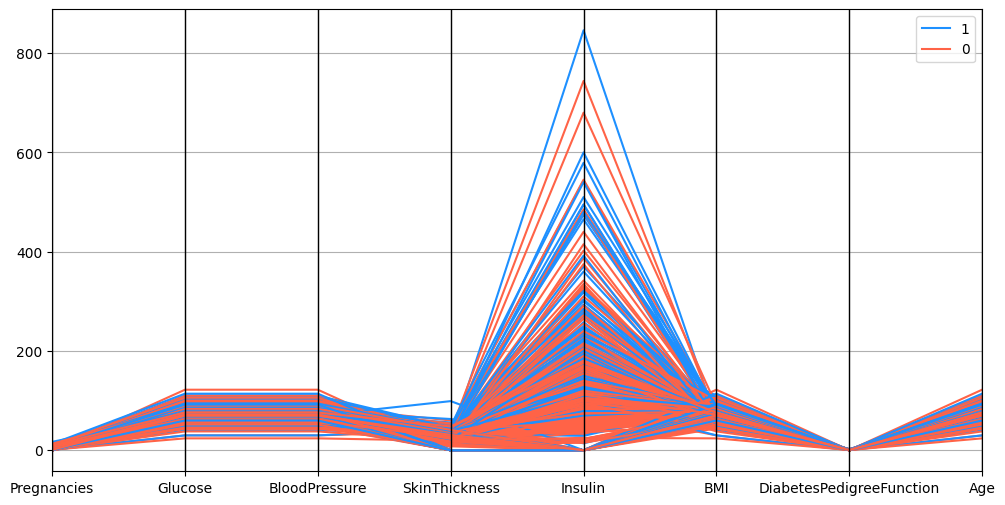

In [128]:
plt.figure(figsize=(12, 6))

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#1E90FF", "#FF6347", "#32CD32"))

plt.show()

In [129]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

In [130]:
# Crear y entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

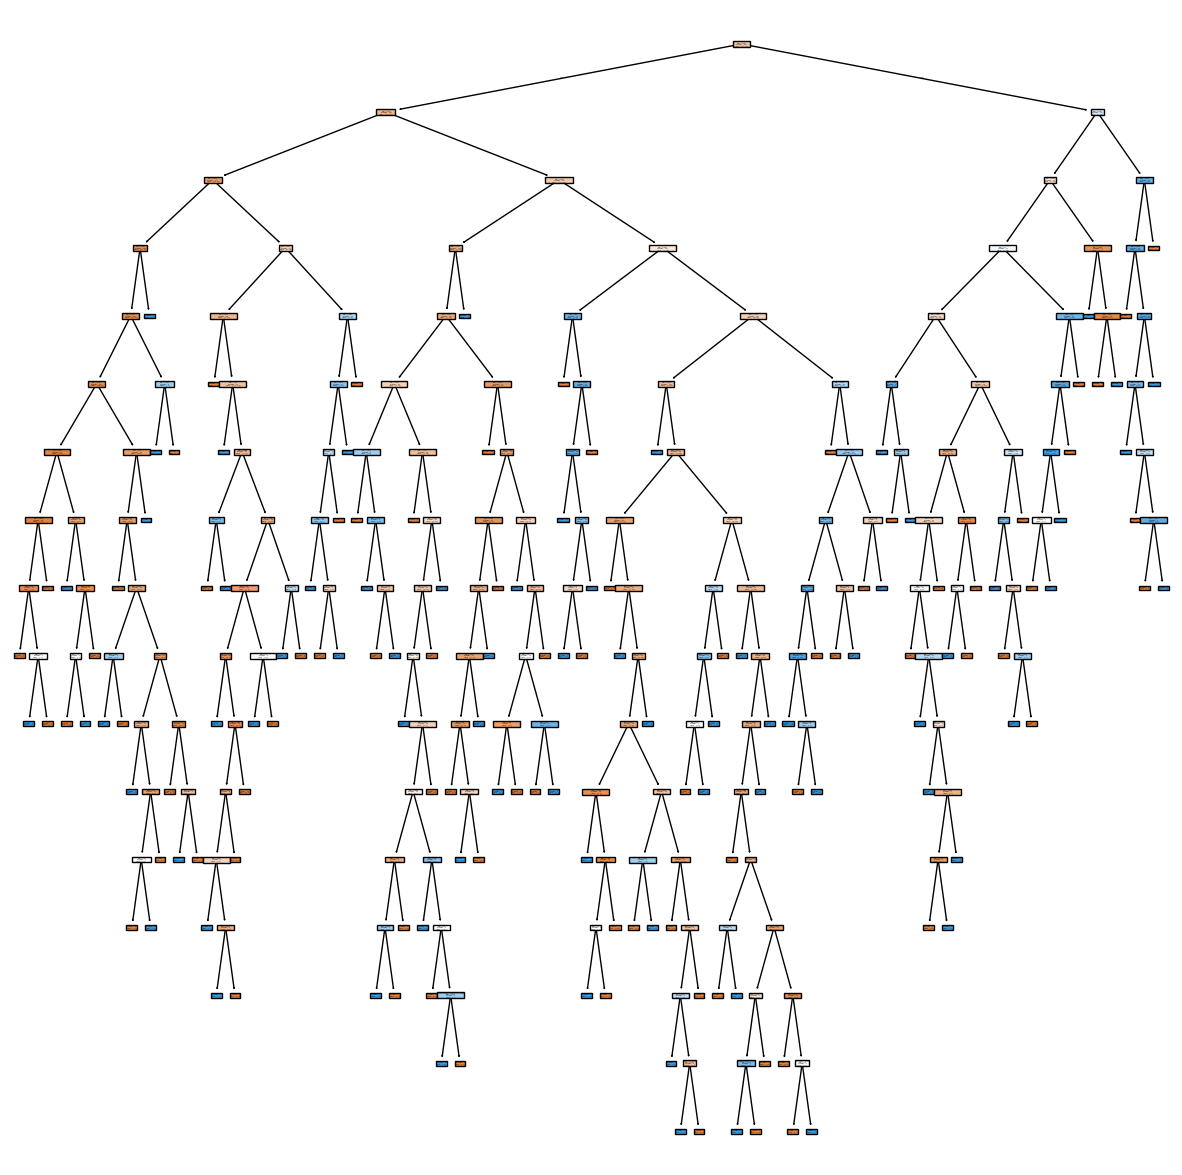

In [131]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), filled = True)

plt.show()

In [132]:
# Realizamos la prediccion en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [133]:
accuracy_sin_opt = accuracy_score(y_test, y_pred)
print('Accuracy Score: {:.2f}%'.format(accuracy_sin_opt * 100))

Accuracy Score: 55.84%


In [134]:
# Definimos el modelo de arbol de decision
model = DecisionTreeClassifier()

# Definimos los hiperparametros que vamos a probar
hyperparams = {
  'criterion' : ['gini', 'entropy'],
  'max_depth' : [5, 10, 20],
  'min_samples_split' : [2, 5, 10],
  'min_samples_leaf' : [1, 2, 4]
}

# Configuramos la busqueda
grid = GridSearchCV(model, hyperparams, scoring = 'accuracy', cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [135]:
# Ajustamos el modelo utilizando los datos de entrenamiento
grid.fit(X_train, y_train)

# Mejores hyperparametros
print(f'Best hyperparameters: {grid.best_params_}')

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [136]:
best_params = grid.best_params_

In [137]:
model = DecisionTreeClassifier(
  criterion = best_params['criterion'],
  max_depth = best_params['max_depth'],
  min_samples_leaf = best_params['min_samples_leaf'],
  min_samples_split = best_params['min_samples_split'],
  random_state = 42
)

# Ajustamos el modelo usando los daos de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=42)

In [138]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [139]:
accuracy_opt = accuracy_score(y_test, y_pred)

print('Accuracy Score with hyperparameters: {:.2f}%'.format(accuracy_opt * 100))

Accuracy Score with hyperparameters: 61.04%


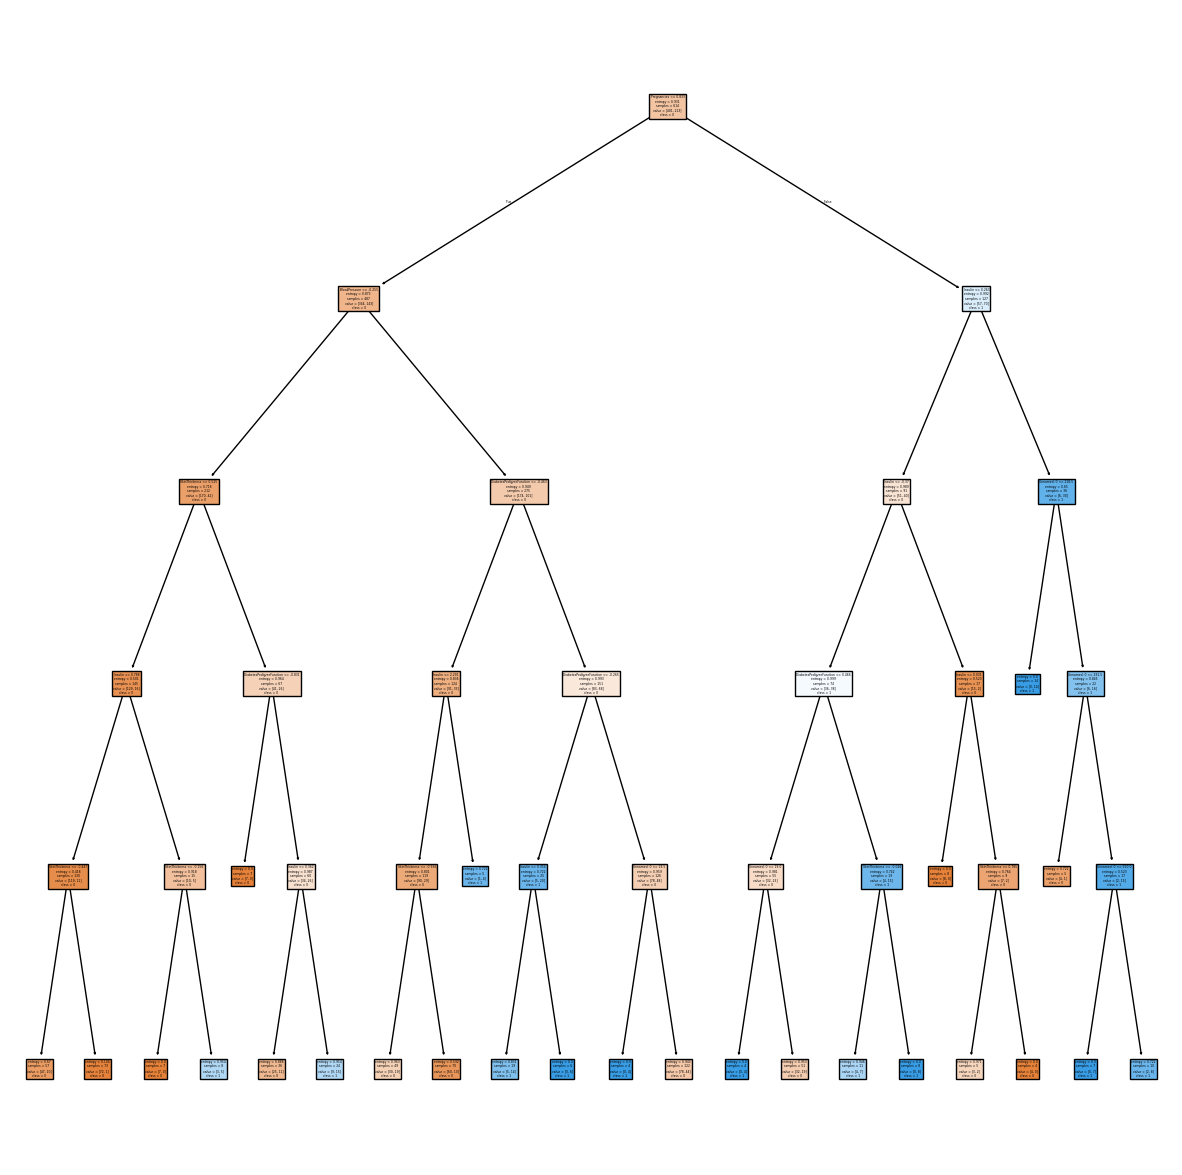

In [140]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
plt.show()